**Oasis Infotech - DATA ANALYTICS INTERNSHIP**

**Name: Sanskruti Satish Khedkar**

**Task - 01**

**Exploratory Data Analysis (EDA) on Retail Sales Data**  

In [1]:
import pandas as pd

**Loading the dataset**

In [2]:

data = pd.read_csv('retail_sales_dataset.csv')

In [3]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# Verify the conversion
print(data.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [8]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
print("Total sales : {}".format(data["Quantity"].sum()))
print("Total profit : {}".format(data["Total Amount"].sum()))

Total sales : 2514
Total profit : 456000


# **Descriptive Statistics**

In [11]:
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [12]:
# Calculate basic statistics
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
mode_values = data.mode(numeric_only=True).iloc[0]
std_dev_values = data.std(numeric_only=True)

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)
print("Standard deviation values:\n", std_dev_values)

Mean values:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64
Median values:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Mode values:
 Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64
Standard deviation values:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


# **Time Series Analysis**

In [13]:
# Group by date and calculate total sales per day
daily_sales = data.groupby('Date')['Total Amount'].sum()


<Axes: title={'center': 'Daily Sales Over Time'}, xlabel='Date'>

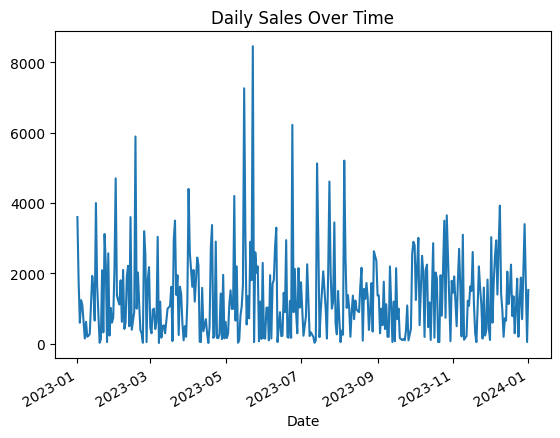

In [14]:
# Plot the time series
daily_sales.plot(title='Daily Sales Over Time')

# **Customer and Product Analysis**

In [19]:
# Customer demographics analysis
customer_demographics = data.groupby('Customer ID').agg({
    'Gender': 'first',
    'Age': 'first',
    'Total Amount': 'sum'
})

In [20]:
# Product category analysis
product_sales = data.groupby('Product Category')['Total Amount'].sum()

print(customer_demographics)
print(product_sales)

             Gender  Age  Total Amount
Customer ID                           
CUST001        Male   34           150
CUST002      Female   26          1000
CUST003        Male   50            30
CUST004        Male   37           500
CUST005        Male   30           100
...             ...  ...           ...
CUST995      Female   41            30
CUST996        Male   62            50
CUST997        Male   52            90
CUST998      Female   23           100
CUST999      Female   36           150

[1000 rows x 3 columns]
Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


# **Visualization**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


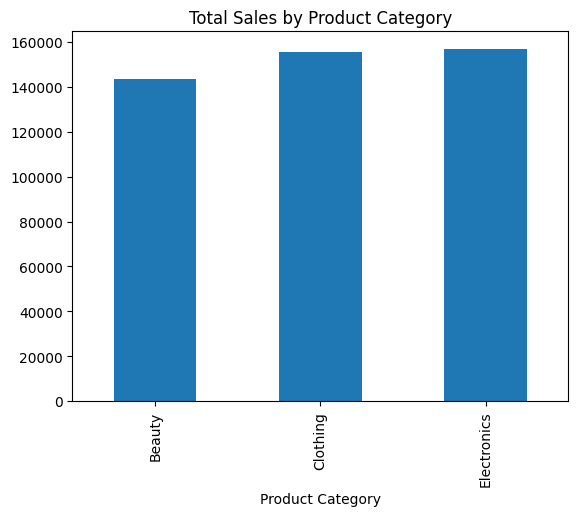

In [22]:
# Bar chart for product sales
product_sales.plot(kind='bar', title='Total Sales by Product Category')
plt.show()

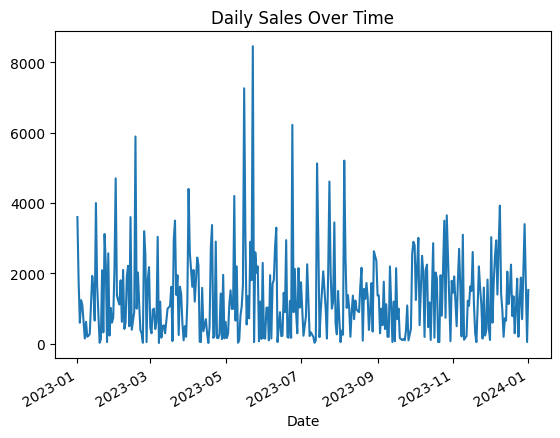

In [23]:
# Line plot for time series analysis
daily_sales.plot(title='Daily Sales Over Time')
plt.show()

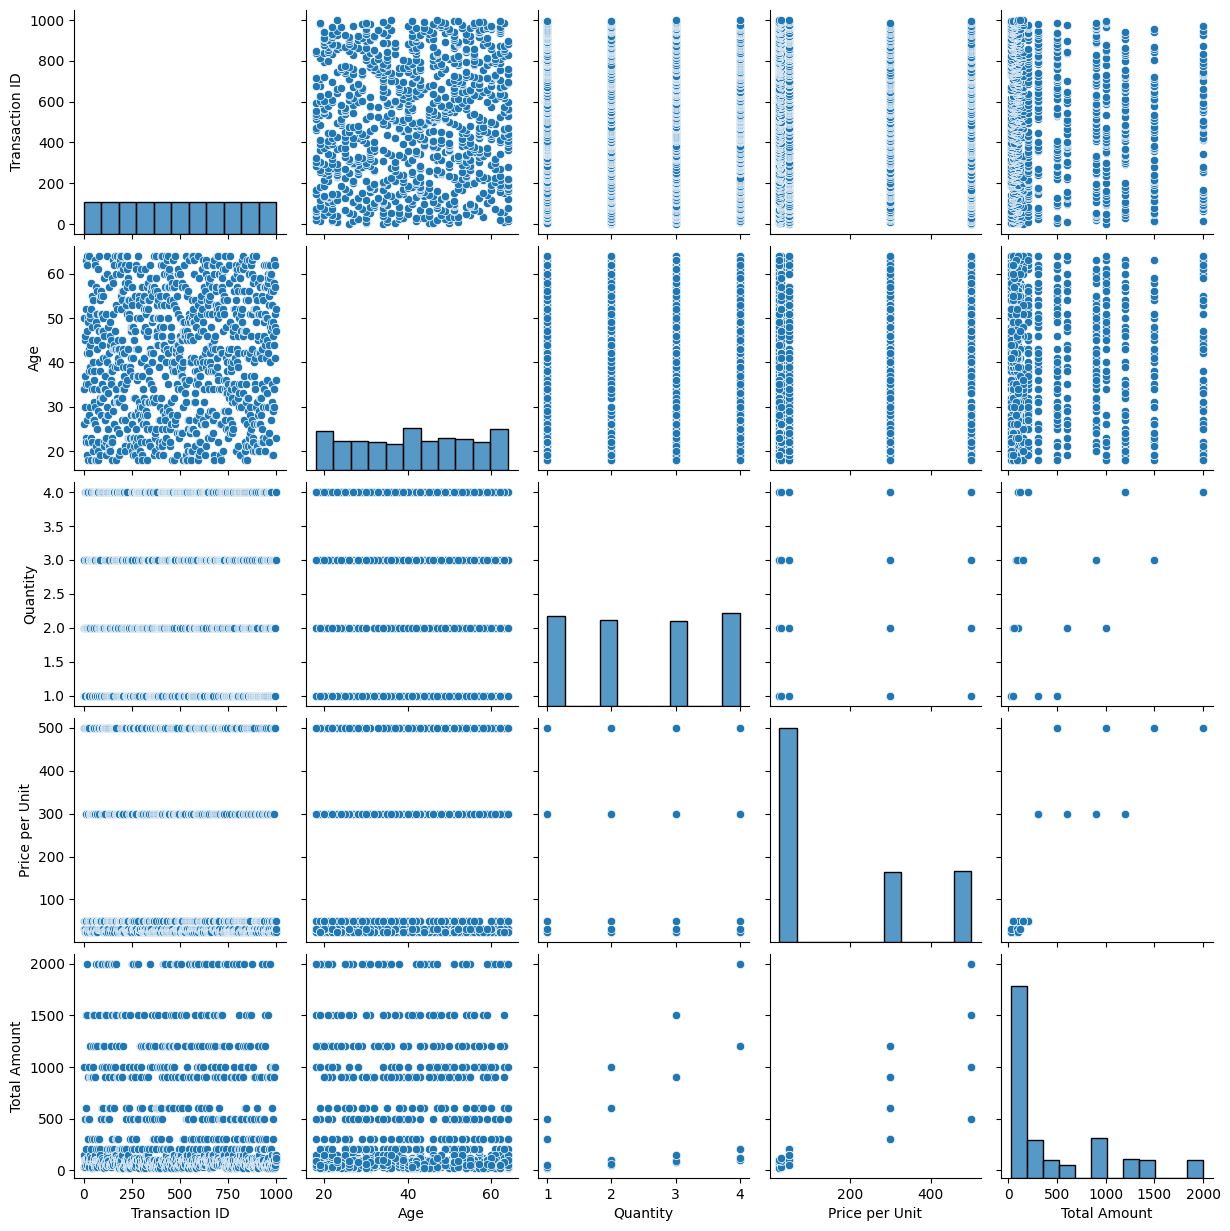

In [31]:
# Pairplot for exploring relationships between numerical columns
sns.pairplot(data)
plt.show()

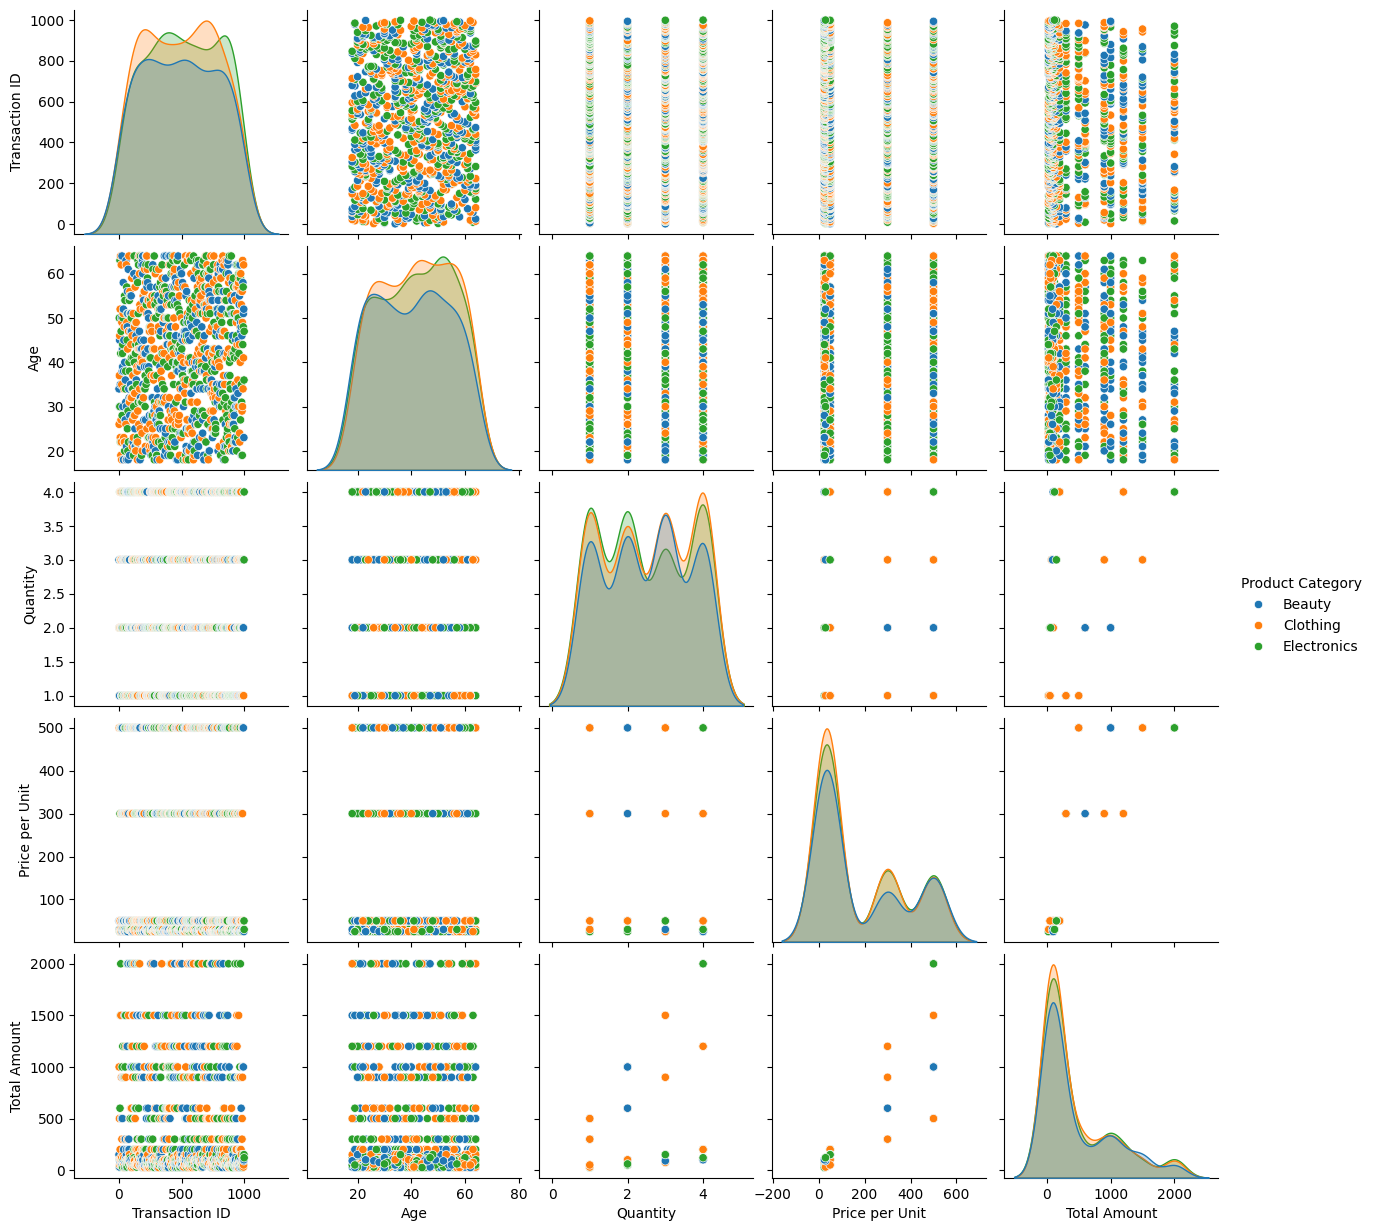

In [34]:
sns.pairplot(data, hue="Product Category")


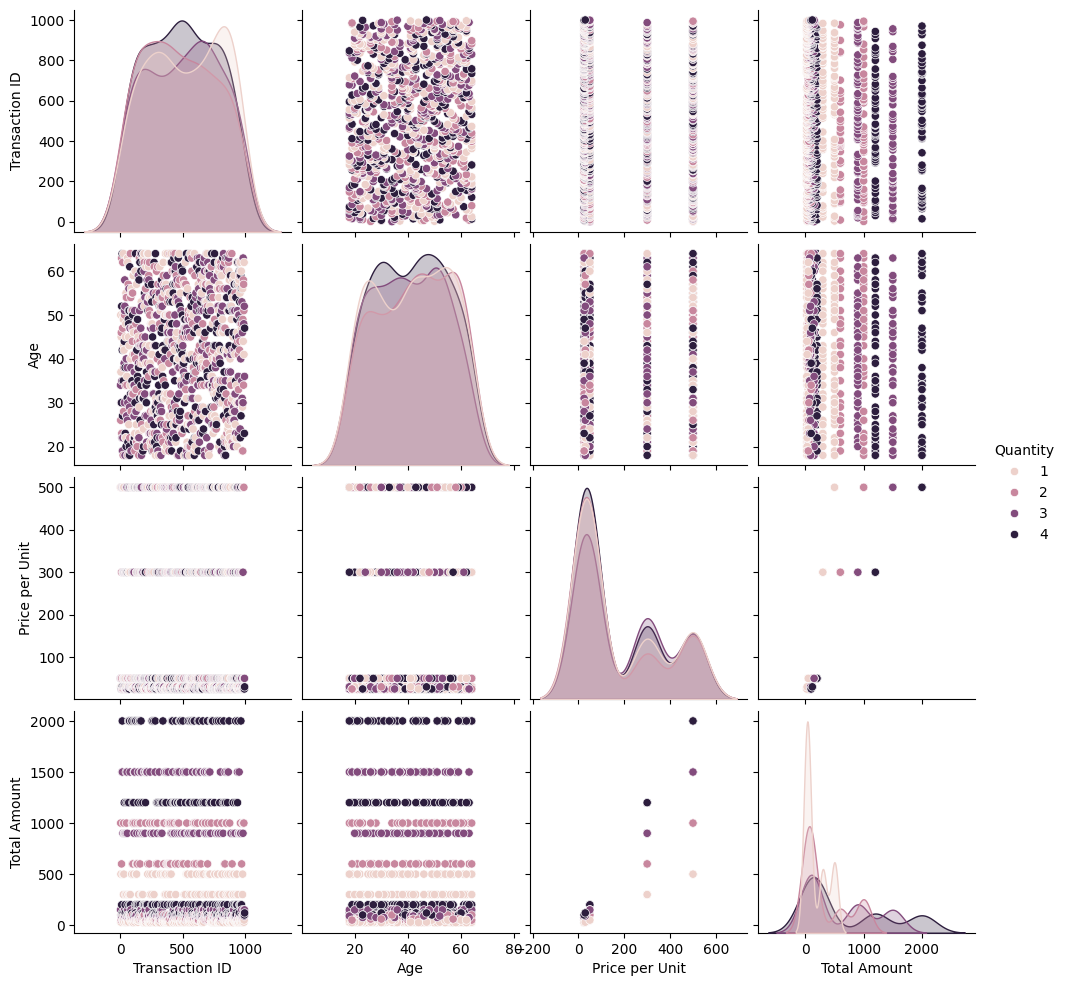

In [37]:
sns.pairplot(data, hue="Quantity")

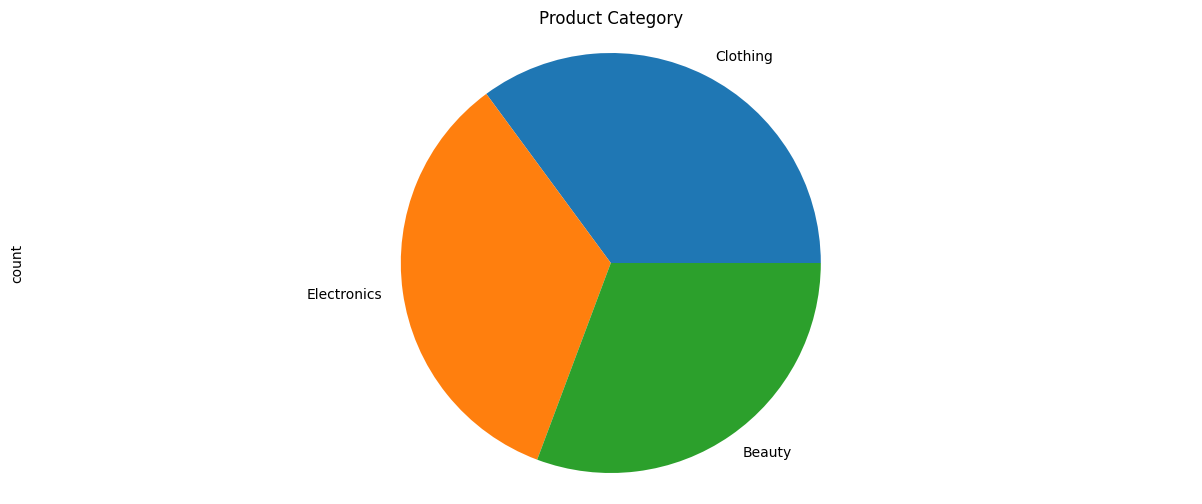

In [39]:
cate=data["Product Category"].value_counts()
explode_list=[0,0.1,0.1]
color_list=["Red","Blue","Green"]
cate.plot(kind="pie", figsize=(15,6))
plt.title("Product Category")
plt.axis("equal")
plt.show()

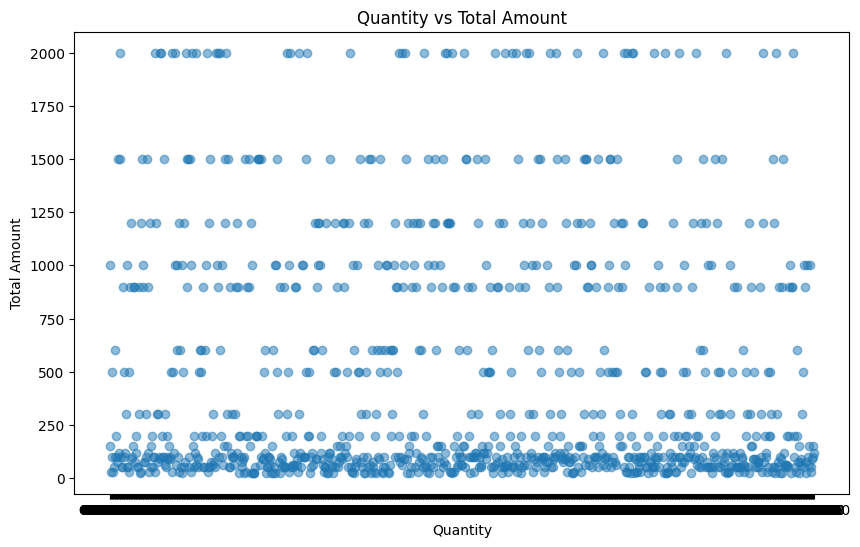

In [42]:
# Scatter plot for Quantity vs Total Amount
plt.figure(figsize=(10, 6))
plt.scatter(data['Customer ID'], data['Total Amount'], alpha=0.5)
plt.title('Quantity vs Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()

# Recommendations:
Based on the EDA, here are some actionable recommendations such as:

1.Focus marketing efforts on the top-performing product categories.

2.Target promotions to customer segments with higher purchasing power.

3.Monitor sales trends to adjust inventory and staffing.